In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [5]:
title_map={"Capt":"Officer",
           "Col":"Officer",
           "Major":"Officer",
           "Johkheer":"Royalty",
           "Don":"Royalty",
           "Sir":"Royalty",
           "Dr":"Royalty",
           "Rev":"Officer",
           "The Countess":"Royalty",
           "Dona":"Royalty",
           "Mme":"Mrs",
           "Mlle":"Miss",
           "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Officer"}
data["Title"]=data.Title.map(title_map)

In [6]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [7]:
data["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     12
Royalty      9
Name: Title, dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [9]:
def passenger_type (row):
    if row['Age']<2:
        return 'Infant'
    elif (row['Age']>=2 and row['Age']<12):
        return 'Child'
    elif (row['Age']>=12 and row['Age']<18):
        return 'Youth'
    elif (row['Age']>=18 and row['Age']<65):
        return 'Adult'
    elif row['Age']>=65:
        return 'Senior'
    elif row['Title']>='Master':
        return 'Child'
    elif row['Title']>='Miss':
        return 'Child'
    elif row['Title']>='Mr' or row['Title']=='Mrs':
        return 'Adult'
    else:
        return 'Unknown'

In [10]:
data['PassengerType']=data.apply(lambda row: passenger_type(row),axis=1)

In [11]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [12]:
data["PassengerType"].value_counts()

Adult     590
Child     231
Youth      45
Infant     14
Senior     11
Name: PassengerType, dtype: int64

In [13]:
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [14]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [15]:
passengertype_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data["PassengerType"]=data["PassengerType"].map(passengertype_map)

In [16]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4


In [17]:
kolom = ['Name', 'Age']
data2 = pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv', usecols=kolom, nrows=12)
data2.insert(value=data2.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=2,column="Title")
data2["Title"]=data2.Title.map(title_map)
data2['PassengerType']=data2.apply(lambda row: passenger_type(row),axis=1)
data2.head()

,Name,Age,Title,PassengerType
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult
4,"Allen, Mr. William Henry",35.0,Mr,Adult


In [18]:
#Nominal
nencode = pd.get_dummies(data2['Name'])
nencode.head()

,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data3 = pd.concat([data2, nencode], axis='columns')
data3

,Name,Age,Title,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,"Allen, Mr. William Henry",35.0,Mr,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",NaN,Mr,Child,0,0,0,0,0,0,0,0,1,0,0,0
6,"McCarthy, Mr. Timothy J",54.0,Mr,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,"Palsson, Master. Gosta Leonard",2.0,Master,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
data3.drop(columns=["Name","Age","Title"], inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,Child,0,0,0,0,0,0,0,0,1,0,0,0
6,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
#Ordinal
data3['PassengerType'].replace(passengertype_map, inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,4,0,0,1,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,1,0,0,0
6,4,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0,1,0
8,4,0,0,0,0,0,0,1,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [23]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.024121
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.020938
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.236619
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.018572
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.250821
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.137932
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.087756
PassengerType,0.024121,-0.020938,-0.236619,0.018572,0.672077,-0.250821,-0.137932,0.087756,1.000000


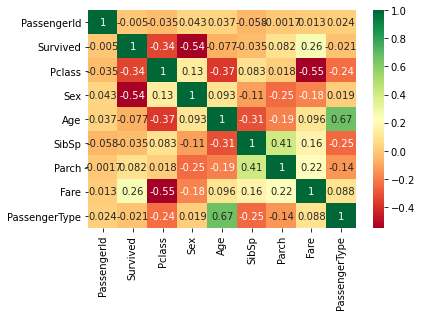

In [24]:
titanic_corr(data)

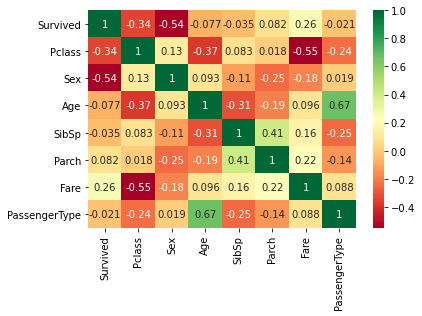

In [27]:
data.drop(["PassengerId"], inplace=True, axis=1)
titanic_corr(data)

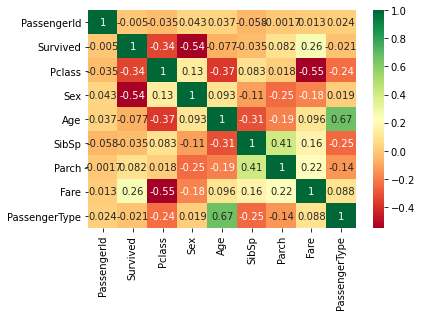

In [141]:
def titanic_corr(data3):
  correlation=data3.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [ ]:
titanic_corr(data)